# *1.Import Libraries*

In [181]:
#Import libraries

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import random

#Import visualization libraries

import matplotlib.pyplot as plt # Creates basic and flexible data visualizations.
import seaborn as sns #Makes statistical data visualizations.
import plotly.express as px #Creates interactive and dynamic graphics







# *2.Loading and checking data*

In [182]:
#Including the data set in the notebook.
df_ = pd.read_csv(filepath_or_buffer = "/kaggle/input/electric-vhicule-population-data/Electric_Vehicle_Population_Data.csv")
df = df_.copy()

In [183]:
#First 3 observations of the dataset.
df.head(n=3)


,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,JTMAB3FV3P,Kitsap,Seabeck,WA,98380.0,2023,TOYOTA,RAV4 PRIME,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,42.0,0.0,35.0,240684006,POINT (-122.8728334 47.5798304),PUGET SOUND ENERGY INC,5.303509e+10
1,1N4AZ1CP6J,Kitsap,Bremerton,WA,98312.0,2018,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,151.0,0.0,35.0,474183811,POINT (-122.6961203 47.5759584),PUGET SOUND ENERGY INC,5.303508e+10
2,5YJ3E1EA4L,King,Seattle,WA,98101.0,2020,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,266.0,0.0,43.0,113120017,POINT (-122.3340795 47.6099315),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10


In [184]:
#Last 3 observations of the dataset.
df.tail(3)

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
205436,5YJXCDE22H,Spokane,Cheney,WA,99004.0,2017,TESLA,MODEL X,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,200.0,0.0,6.0,221631588,POINT (-117.5836098 47.4951312),BONNEVILLE POWER ADMINISTRATION||AVISTA CORP||...,5.306301e+10
205437,5YJ3E1EA3J,King,Vashon,WA,98070.0,2018,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,215.0,0.0,34.0,336983496,POINT (-122.466938 47.429244),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
205438,7SAYGDEE7P,Spokane,Spokane,WA,99208.0,2023,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0.0,6.0,228335040,POINT (-117.4268937 47.7323627),BONNEVILLE POWER ADMINISTRATION||AVISTA CORP||...,5.306301e+10


In [185]:
#Allows us to see the number of rows and columns in the dataset.
df.shape

(205439, 17)

In [186]:
#The data type of each column, the number of columns and rows, memory use,missing values, and the numerical distribution of data types are all displayed.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205439 entries, 0 to 205438
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         205439 non-null  object 
 1   County                                             205436 non-null  object 
 2   City                                               205436 non-null  object 
 3   State                                              205439 non-null  object 
 4   Postal Code                                        205436 non-null  float64
 5   Model Year                                         205439 non-null  int64  
 6   Make                                               205439 non-null  object 
 7   Model                                              205438 non-null  object 
 8   Electric Vehicle Type                              205439 non-null  object

In [187]:
#Viewing the variables we have and their types
df.dtypes


VIN (1-10)                                            object
County                                                object
City                                                  object
State                                                 object
Postal Code                                          float64
Model Year                                             int64
Make                                                  object
Model                                                 object
Electric Vehicle Type                                 object
Clean Alternative Fuel Vehicle (CAFV) Eligibility     object
Electric Range                                       float64
Base MSRP                                            float64
Legislative District                                 float64
DOL Vehicle ID                                         int64
Vehicle Location                                      object
Electric Utility                                      object
2020 Census Tract       

In [188]:
df.describe()
#count: The column's total number of non-null values.

#mean: The column's average of the values.

#std: The values in the column's standard deviation.

#min: The column's smallest value.

#25%: The value that falls below 25% of the numbers in the column is known as the lower quartile.

#50%: The value that falls between half and half of the values in the column is called the median, or 50%.

#75%: The value below 75% of the values in the column, or the upper quartile.

#max: The column's highest value.



,Postal Code,Model Year,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,2020 Census Tract
count,205436.000000,205439.000000,205431.000000,205431.000000,204997.000000,2.054390e+05,2.054360e+05
mean,98177.971870,2020.960363,52.164342,922.670532,28.970848,2.277156e+08,5.297704e+10
std,2419.037479,2.989059,88.075859,7761.753602,14.910052,7.205737e+07,1.588435e+09
min,1731.000000,1997.000000,0.000000,0.000000,1.000000,4.469000e+03,1.001020e+09
25%,98052.000000,2019.000000,0.000000,0.000000,17.000000,1.935324e+08,5.303301e+10
50%,98125.000000,2022.000000,0.000000,0.000000,33.000000,2.382368e+08,5.303303e+10
75%,98372.000000,2023.000000,48.000000,0.000000,42.000000,2.618718e+08,5.305307e+10
max,99577.000000,2025.000000,337.000000,845000.000000,49.000000,4.792548e+08,5.602100e+10


# *2.1.Explanation of Variables*
1. Postal Code: ZIP code for the area.
2. Model Year: The year the vehicle was manufactured.
3. Electric Range: How far an EV can go between charges.
4. Base MSRP: The vehicle's initial purchase price.
5. Legislative District: A representational political district.
6. DOL Vehicle ID: A special identification number for a car.
7. Census Tract 2020: Census data geographic region.

  * Categorical Variable: County
  *  Numeric Variables :Postal Code, Model Year, Electric Range, Base MSRP, Legislative District, Census Tract 2020

# *3.Observation of Missing and Non-Missing Data*

In [189]:
df.isna().sum()

#We can see the number of missing data for each title.

VIN (1-10)                                             0
County                                                 3
City                                                   3
State                                                  0
Postal Code                                            3
Model Year                                             0
Make                                                   0
Model                                                  1
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                         8
Base MSRP                                              8
Legislative District                                 442
DOL Vehicle ID                                         0
Vehicle Location                                       8
Electric Utility                                       3
2020 Census Tract                                      3
dtype: int64

In [190]:
df.isna().sum().sum()
#We can see the total number of missing values

482

In [191]:
#We can see the number of non-missing data for each title.
df.notnull().sum()


VIN (1-10)                                           205439
County                                               205436
City                                                 205436
State                                                205439
Postal Code                                          205436
Model Year                                           205439
Make                                                 205439
Model                                                205438
Electric Vehicle Type                                205439
Clean Alternative Fuel Vehicle (CAFV) Eligibility    205439
Electric Range                                       205431
Base MSRP                                            205431
Legislative District                                 204997
DOL Vehicle ID                                       205439
Vehicle Location                                     205431
Electric Utility                                     205436
2020 Census Tract                       

In [192]:
#We can see the total number of non-missing values
df.notnull().sum().sum()

3491981

In [193]:
#We access records that are missing at least one observation in the data set.
df[df.isnull().any(axis = 1)]

#As you can see, we have some NaN values ​​in the Legislative District, Base MSRP and Electric Range headings.

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
26697,5YJYGDEF3L,Platte,Platte City,MO,64079.0,2020,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,291.0,0.0,NaN,132400684,POINT (-94.7758051 39.3549561),NON WASHINGTON STATE ELECTRIC UTILITY,2.916503e+10
31588,W1K6G8CB9R,King,Des Moines,WA,98198.0,2024,MERCEDES-BENZ,S-CLASS,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,NaN,NaN,33.0,268383069,POINT (-122.3145447 47.3984346),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
33457,7FCTGAAA2N,Monterey,Seaside,CA,93955.0,2022,RIVIAN,R1T,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0.0,NaN,256961141,POINT (-121.831434 36.614732),NON WASHINGTON STATE ELECTRIC UTILITY,6.053014e+09
38814,1G1RD6E46D,Norfolk,Norfolk,VA,23503.0,2013,CHEVROLET,VOLT,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,38.0,0.0,NaN,131848146,POINT (-76.251684 36.942546),NON WASHINGTON STATE ELECTRIC UTILITY,5.171000e+10
40765,5YJYGDEE4M,Cumberland,Fayetteville,NC,28312.0,2021,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0.0,NaN,180440935,POINT (-78.780926 35.019816),NON WASHINGTON STATE ELECTRIC UTILITY,3.705100e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
204210,7SAYGDEE3R,Bexar,San Antonio,TX,78261.0,2024,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0.0,NaN,262911043,POINT (-98.4154843 29.6721151),NON WASHINGTON STATE ELECTRIC UTILITY,4.802912e+10
204576,7SAYGDEE6P,San Diego,Coronado,CA,92118.0,2023,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0.0,NaN,256324498,POINT (-117.170566 32.684631),NON WASHINGTON STATE ELECTRIC UTILITY,6.073011e+09
204733,5YJSA1E40F,El Paso,Colorado Springs,CO,80906.0,2015,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,208.0,0.0,NaN,232975263,POINT (-104.819948 38.788438),NON WASHINGTON STATE ELECTRIC UTILITY,8.041003e+09
205115,5YJXCAE28G,Saratoga,Greenfield Center,NY,12833.0,2016,TESLA,MODEL X,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,200.0,0.0,NaN,218050878,POINT (-73.845094 43.12833),NON WASHINGTON STATE ELECTRIC UTILITY,3.609106e+10


# *3.1. Random Assignment and Observation of NaN Values*

In [194]:
def add_random_missing_values(dataframe: pd.DataFrame,
                              missing_rate: float = 0.02) -> pd.DataFrame:
    """Turns random values to NaN in a DataFrame.

    To use this function, you need to import pandas, numpy and random libraries.

    Args:
        dataframe (pd.DataFrame): DataFrame to be processed.
        missing_rate (float): Percentage of missing value rate in float format. Defaults 0.05

    Returns:
        df_missing (pd.DataFrame): Processed DataFrame object.

    """
    # Get copy of dataframe
    df_missing = dataframe.copy()

    # Obtain size of dataframe and number total number of missing values
    df_size = dataframe.size
    num_missing = int(df_size * missing_rate)

    # Get random row and column indexes to turn them NaN
    for _ in range(num_missing):
        row_idx = random.randint(0, dataframe.shape[0] - 1)
        col_idx = random.randint(0, dataframe.shape[1] - 1)

        df_missing.iat[row_idx, col_idx] = np.nan

    return df_missing

In [195]:
print("Original Dataframe:")
print(df)
#Prints the original dataset to the screen


Original Dataframe:
        VIN (1-10)     County       City State  Postal Code  Model Year  \
0       JTMAB3FV3P     Kitsap    Seabeck    WA      98380.0        2023   
1       1N4AZ1CP6J     Kitsap  Bremerton    WA      98312.0        2018   
2       5YJ3E1EA4L       King    Seattle    WA      98101.0        2020   
3       1N4AZ0CP8E       King    Seattle    WA      98125.0        2014   
4       1G1FX6S00H   Thurston       Yelm    WA      98597.0        2017   
...            ...        ...        ...   ...          ...         ...   
205434  1N4BZ1CV2N     Chelan  Peshastin    WA      98847.0        2022   
205435  1FTVW1EV0P  Snohomish    Everett    WA      98208.0        2023   
205436  5YJXCDE22H    Spokane     Cheney    WA      99004.0        2017   
205437  5YJ3E1EA3J       King     Vashon    WA      98070.0        2018   
205438  7SAYGDEE7P    Spokane    Spokane    WA      99208.0        2023   

             Make       Model                   Electric Vehicle Type  \
0     

In [196]:
df_with_missing = add_random_missing_values(df, missing_rate=0.02)

print("\nDataFrame with missing values ​​added:")
print(df_with_missing)
#Prints the dataset to which NaN values ​​are randomly assigned.


DataFrame with missing values ​​added:
        VIN (1-10)     County       City State  Postal Code  Model Year  \
0       JTMAB3FV3P     Kitsap    Seabeck    WA          NaN      2023.0   
1       1N4AZ1CP6J     Kitsap  Bremerton    WA      98312.0      2018.0   
2       5YJ3E1EA4L       King    Seattle    WA      98101.0      2020.0   
3       1N4AZ0CP8E       King    Seattle   NaN      98125.0      2014.0   
4       1G1FX6S00H   Thurston        NaN    WA      98597.0      2017.0   
...            ...        ...        ...   ...          ...         ...   
205434  1N4BZ1CV2N     Chelan  Peshastin    WA      98847.0      2022.0   
205435  1FTVW1EV0P  Snohomish    Everett    WA      98208.0      2023.0   
205436  5YJXCDE22H    Spokane     Cheney    WA      99004.0      2017.0   
205437  5YJ3E1EA3J       King     Vashon    WA      98070.0      2018.0   
205438  7SAYGDEE7P    Spokane    Spokane    WA      99208.0      2023.0   

             Make       Model                   Electric Ve

In [197]:
df_with_missing.isnull().sum()
#It allows us to see how many NaN values ​​there are for which heading after the randomly assigned NaN values.

VIN (1-10)                                           4111
County                                               4090
City                                                 4199
State                                                3914
Postal Code                                          4085
Model Year                                           4077
Make                                                 4046
Model                                                4024
Electric Vehicle Type                                4050
Clean Alternative Fuel Vehicle (CAFV) Eligibility    4092
Electric Range                                       4041
Base MSRP                                            4016
Legislative District                                 4500
DOL Vehicle ID                                       4005
Vehicle Location                                     4130
Electric Utility                                     4108
2020 Census Tract                                    4130
dtype: int64

In [198]:
df_with_missing.isnull().sum().sum()
#Calculate NaN sum for new dataset

69618

As we can see, while there were 482 missing values ​​in our original dataset, there were new missing values ​​as a result of the randomly added NaN values. Dataset is a database containing specifications for electric and hybrid vehicles registered in the US. Data can be used to analyze characteristics such as vehicle types, models, regional distributions, and environmental suitability. There are NaN (missing) values ​​in the columns. For example: Postal Code, Base MSRP, and DOL Vehicle ID columns are missing values. 
* Sample Data:

Vehicle: TOYOTA RAV4 PRIME, model 2023, Plug-in Hybrid Electric Vehicle, 42 miles of electric range, registered in zip code 98380.


# *3.2.Deletion or Filling of Missing Data*

In [199]:
df_with_missing = df_with_missing.drop(columns=['Postal Code'], errors='ignore')
df_with_missing = df_with_missing.drop(columns=['2020 Census Tract'], errors='ignore')
df_with_missing = df_with_missing.drop(columns=['Vehicle Location'], errors='ignore')
print(df_with_missing.columns)
#Removing unnecessary columns with the drop method.

Index(['VIN (1-10)', 'County', 'City', 'State', 'Model Year', 'Make', 'Model',
       'Electric Vehicle Type',
       'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Electric Range',
       'Base MSRP', 'Legislative District', 'DOL Vehicle ID',
       'Electric Utility'],
      dtype='object')


We have removed the 2020 Census Tract and Vehicle Location data due to their incomprehensible nature. For example, Vehicle Location had values ​​like POINT (-122.8728334 47.5798304), while 2020 Census Tract had values ​​like 5.303509e+10. So they were removed. The Postal Code value was removed because the County, City, and State values ​​are available.

In [200]:
df_with_missing = df_with_missing.dropna(subset=['VIN (1-10)'])
print(df_with_missing['VIN (1-10)'].isna().sum()) 
#NaN values ​​were removed with dropna and the number of null values ​​was printed on the screen.

0


Since VIN (1-10) values ​​are specific to cars, I eliminated NaN values ​​rather than padding them with an average value or otherwise.

In [201]:
most_common_value = df_with_missing['County'].mode()[0]
df_with_missing['County'] = df_with_missing['County'].fillna(most_common_value)
print(df_with_missing['County'].isna().sum()) 
#Most common values ​​were calculated using the mode() function and NaN values ​​were filled.

0


In [202]:
most_common_value = df_with_missing['City'].mode()[0]
df_with_missing['City'] = df_with_missing['City'].fillna(most_common_value)
print(df_with_missing['City'].isna().sum()) 
#Most common values ​​were calculated using the mode() function and NaN values ​​were filled.

0


In [203]:
most_common_value = df_with_missing['State'].mode()[0]
df_with_missing['State'] = df_with_missing['State'].fillna(most_common_value)
print(df_with_missing['State'].isna().sum()) 
#Most common values ​​were calculated using the mode() function and NaN values ​​were filled.

0


Since the county, city and state values ​​are not unique, we filled the NaN values ​​by taking the most common values, so the NaN values ​​were updated to 0.

In [204]:
# Filter values ​​with Model Year >= 2025
invalid_model_years = df_with_missing[df_with_missing['Model Year'] >= 2025]

# Print the results to the screen
print("Model Year values ​​2025 or older:")
print(invalid_model_years)





Model Year values ​​2025 or older:
        VIN (1-10)     County           City State  Model Year    Make  \
40      5UX43EU02S       King        Seattle    WA      2025.0     BMW   
123     YV4H60PF7S     Chelan         Manson    WA      2025.0   VOLVO   
159     5UX43EU03S     Yakima         Yakima    WA      2025.0     BMW   
331     7PDSGBBA5S       King       Kirkland    WA      2025.0  RIVIAN   
2256    5UX43EU00S       King    Woodinville    WA      2025.0     BMW   
...            ...        ...            ...   ...         ...     ...   
204695  JTJHKCFZ9S      Clark  Brush Prairie    WA      2025.0   LEXUS   
204728  7PDSGBBA3S  Snohomish        Edmonds    WA      2025.0  RIVIAN   
204892  KNDRMDJH9S     Benton  West Richland    WA      2025.0     KIA   
205112  JTJHKCFZ6S       King    Woodinville    WA      2025.0   LEXUS   
205275  5UX43EU05S       King     North Bend    WA      2025.0     NaN   

          Model                   Electric Vehicle Type  \
40           X5  

In [205]:
# Drop Model Year lines older than 2025
df_with_missing = df_with_missing.drop(df_with_missing[df_with_missing['Model Year'] > 2025].index)

# Print the updated data frame
print("Model Year values ​​greater than 2025 are removed with drop::")
print(df_with_missing)

Model Year values ​​greater than 2025 are removed with drop::
        VIN (1-10)     County       City State  Model Year       Make  \
0       JTMAB3FV3P     Kitsap    Seabeck    WA      2023.0     TOYOTA   
1       1N4AZ1CP6J     Kitsap  Bremerton    WA      2018.0     NISSAN   
2       5YJ3E1EA4L       King    Seattle    WA      2020.0      TESLA   
3       1N4AZ0CP8E       King    Seattle    WA      2014.0     NISSAN   
4       1G1FX6S00H   Thurston    Seattle    WA      2017.0  CHEVROLET   
...            ...        ...        ...   ...         ...        ...   
205434  1N4BZ1CV2N     Chelan  Peshastin    WA      2022.0     NISSAN   
205435  1FTVW1EV0P  Snohomish    Everett    WA      2023.0       FORD   
205436  5YJXCDE22H    Spokane     Cheney    WA      2017.0      TESLA   
205437  5YJ3E1EA3J       King     Vashon    WA      2018.0      TESLA   
205438  7SAYGDEE7P    Spokane    Spokane    WA      2023.0      TESLA   

             Model                   Electric Vehicle Type  \

In [206]:
most_common_value = df_with_missing['Model Year'].mode()[0]
df_with_missing['Model Year'] = df_with_missing['Model Year'].fillna(most_common_value)
print(df_with_missing['Model Year'].isna().sum()) 
#For Model Year, most common values ​​were taken with mode() and NaN values ​​were filled.

0


First, instead of directly filling in the NaN values, we checked the date for the model year. We checked if there was data for 2025 and older and observed that there was. After getting the necessary outputs, we removed the data for 2025 and older and filled in the remaining NaN values.

In [207]:
df_with_missing = df_with_missing.dropna(subset=['Make'])
print(df_with_missing['Make'].isna().sum()) 
#NaN values ​​removed with dropna

0


NaN values ​​were removed instead of filling in an average value as the manufacturer of the car may vary depending on the model of the car.

In [208]:
df_with_missing  = df_with_missing .dropna(subset=['Model'])
print(df_with_missing ['Model'].isna().sum()) 
#NaN values ​​removed with dropna

0


Since the model names of the car may change and will take on other features depending on their model, NaN values ​​were removed instead of filling with average values.

In [209]:
df_with_missing  = df_with_missing .dropna(subset=['Electric Vehicle Type'])
print(df_with_missing ['Electric Vehicle Type'].isna().sum()) 
#NaN values ​​removed with dropna

0


In Electric Vehicle Type, we removed NaN values ​​instead of filling them according to the most common value, as they can vary by model.

In [210]:
most_common_value = df_with_missing['Clean Alternative Fuel Vehicle (CAFV) Eligibility'].mode()[0]
df_with_missing['Clean Alternative Fuel Vehicle (CAFV) Eligibility'] = df_with_missing['Clean Alternative Fuel Vehicle (CAFV) Eligibility'].fillna(most_common_value)
print(df_with_missing['Clean Alternative Fuel Vehicle (CAFV) Eligibility'].isna().sum())

0


Clean Alternative Fuel Vehicle (CAFV) Eligibility NaN values ​​were filled in instead of removing them directly because they could be filled with most common values.

In [211]:
df_with_missing.loc[:, 'Electric Range'] = df_with_missing['Electric Range'].fillna(df_with_missing['Electric Range'].mean())
print(df_with_missing['Electric Range'].isna().sum())  
#Filling was done for missing values ​​of Electric Range and all empty values ​​were filled with the mean values ​​of Electric Range.

0


Electric Range NaN values ​​were filled in instead of removing them directly because they could be filled with mean().

In [212]:
incorrect_values = df_with_missing[df_with_missing['Base MSRP'] < 0]

if incorrect_values.empty:
    print("There are no incorrect values")




There are no incorrect values


In [213]:
df_with_missing.loc[:, 'Base MSRP'] = df_with_missing['Base MSRP'].fillna(df_with_missing['Base MSRP'].mean())
print(df_with_missing['Base MSRP'].isna().sum()) 

0


First of all, instead of filling the values ​​directly, we checked if there was an incorrect value assignment and observed that there was not. So, we've populated the Base MSRP value with mean().

In [214]:
df_with_missing = df_with_missing.dropna(subset=['DOL Vehicle ID'])
print(df_with_missing['DOL Vehicle ID'].isna().sum()) 
#NaN values ​​removed with dropna

0


Since DOL Vehicle ID is unique data specific to cars, we eliminated NaN values ​​instead of directly filling them with most common values.

In [215]:
df_with_missing.loc[:, 'Legislative District'] = df_with_missing['Legislative District'].fillna(df_with_missing['Legislative District'].mean())
print(df_with_missing['Legislative District'].isna().sum())  
#Filling was done for missing values ​​of Legislative District and all empty values ​​were filled with the mean values ​​of Legislative District.


0


Legislative District NaN values ​​were filled in instead of removing them directly because they could be filled with mean().

In [216]:
# Find the most frequent value
most_common_value = df_with_missing['Electric Utility'].mode()[0]

# Fill in missing values
df_with_missing['Electric Utility'] = df_with_missing['Electric Utility'].fillna(most_common_value)

# Check for missing values
print(df_with_missing['Electric Utility'].isna().sum())


0


Electric Utility NaN values ​​were filled in instead of removing them directly because they could be filled. Since they are both numeric and textual values, NaN values ​​cannot be filled with mean. That's why they are filled with mode().

In [217]:
df_with_missing.isna().sum()
#After removing or filling NaN values, the is null status was checked for each title.

VIN (1-10)                                           0
County                                               0
City                                                 0
State                                                0
Model Year                                           0
Make                                                 0
Model                                                0
Electric Vehicle Type                                0
Clean Alternative Fuel Vehicle (CAFV) Eligibility    0
Electric Range                                       0
Base MSRP                                            0
Legislative District                                 0
DOL Vehicle ID                                       0
Electric Utility                                     0
dtype: int64

In [218]:
df_with_missing.notnull().sum()
#For each title, the number of new grade non-null values ​​was examined.

VIN (1-10)                                           186017
County                                               186017
City                                                 186017
State                                                186017
Model Year                                           186017
Make                                                 186017
Model                                                186017
Electric Vehicle Type                                186017
Clean Alternative Fuel Vehicle (CAFV) Eligibility    186017
Electric Range                                       186017
Base MSRP                                            186017
Legislative District                                 186017
DOL Vehicle ID                                       186017
Electric Utility                                     186017
dtype: int64

In [219]:
df_with_missing.describe()
#The describe operation performed for the original dataset was repeated for the edited dataset.

,Model Year,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID
count,186017.000000,186017.000000,186017.000000,186017.000000,1.860170e+05
mean,2020.999930,52.189954,924.514953,28.975763,2.277927e+08
std,2.972806,87.201950,7708.841748,14.748423,7.217196e+07
min,1997.000000,0.000000,0.000000,1.000000,4.469000e+03
25%,2019.000000,0.000000,0.000000,18.000000,1.936082e+08
50%,2022.000000,0.000000,0.000000,32.000000,2.383245e+08
75%,2023.000000,52.185517,0.000000,42.000000,2.618793e+08
max,2025.000000,337.000000,845000.000000,49.000000,4.792548e+08


# *4.Visualization of the Dataset*

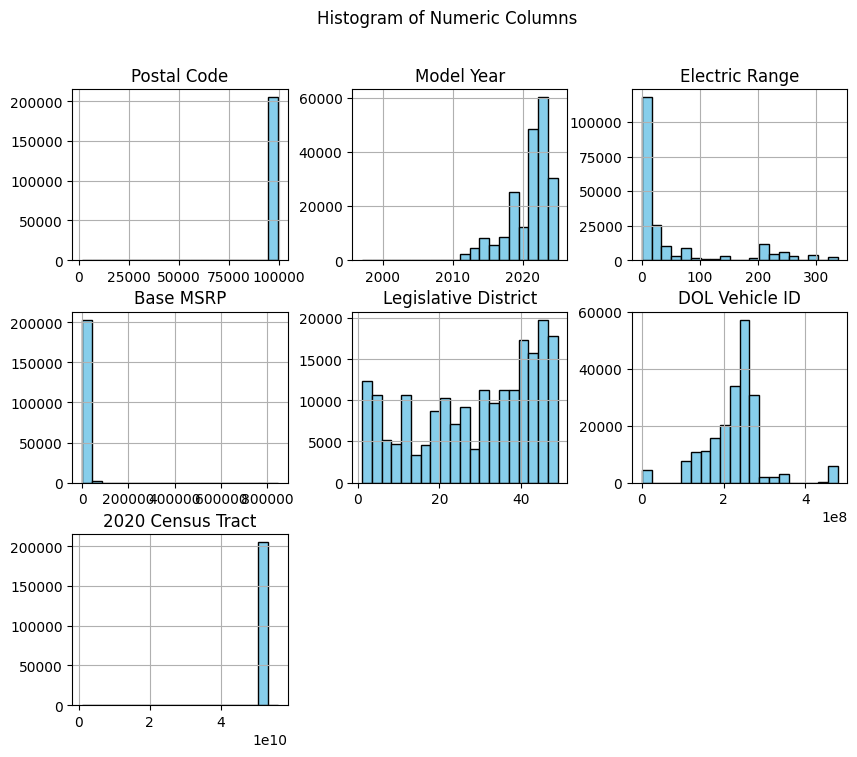

In [220]:
#Selecting numeric columns
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

#Creating a histogram for each numerical column
df[numeric_cols].hist(bins=20, figsize=(10, 8), color='skyblue', edgecolor='black')

#Adding title
plt.suptitle('Histogram of Numeric Columns')
plt.show()

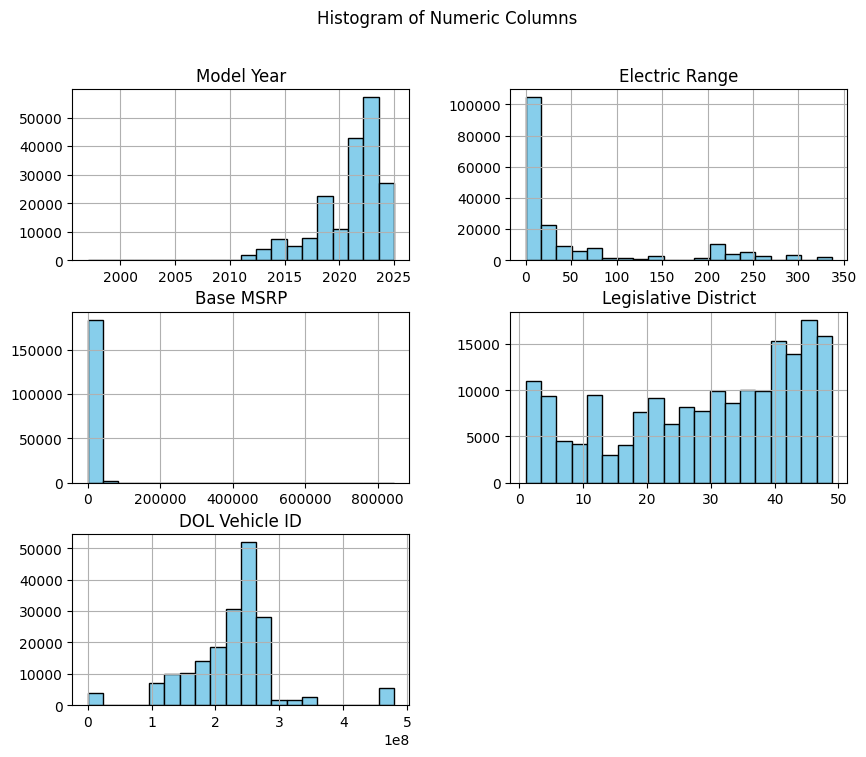

In [221]:
#Selecting numeric columns
numeric_cols = df_with_missing.select_dtypes(include=['float64', 'int64']).columns

#Creating a histogram for each numerical column
df_with_missing[numeric_cols].hist(bins=20, figsize=(10, 8), color='skyblue', edgecolor='black')

#Adding title
plt.suptitle('Histogram of Numeric Columns')
plt.show()

Histogram created for original numeric columns. Then, a histogram was created for the numeric columns containing randomly assigned NaN values ​​and their comparison was examined. As can be seen, no table is created for the columns removed in the second histogram and some values ​​have changed for the other tables. For example in second histogram:
* The data is skewed to the right for characteristics like base price and electric range. This suggests that there are a few high values among the majority of data points, which are concentrated in low values.
* Given that newer models may have a greater range and a higher price trend, there may be a correlation between Model Year and Electric Range or Base MSRP.

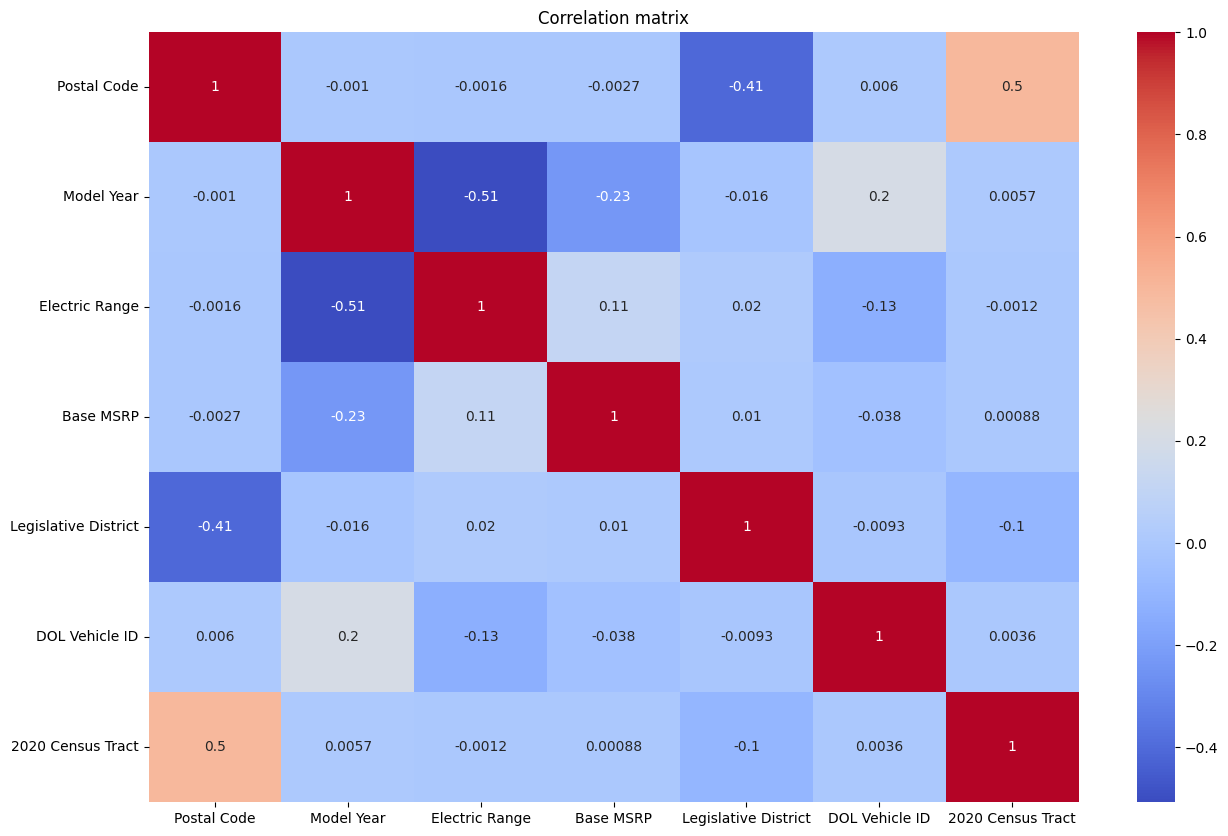

In [222]:
# Set the size of the plot
plt.figure(figsize=(15, 10))
# Select only numeric columns from the DataFrame
numeric_df = df.select_dtypes(include=['number'])
# Create and visualize the correlation matrix
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
# Add a title to the heatmap
plt.title('Correlation matrix')
# Display the plot
plt.show()

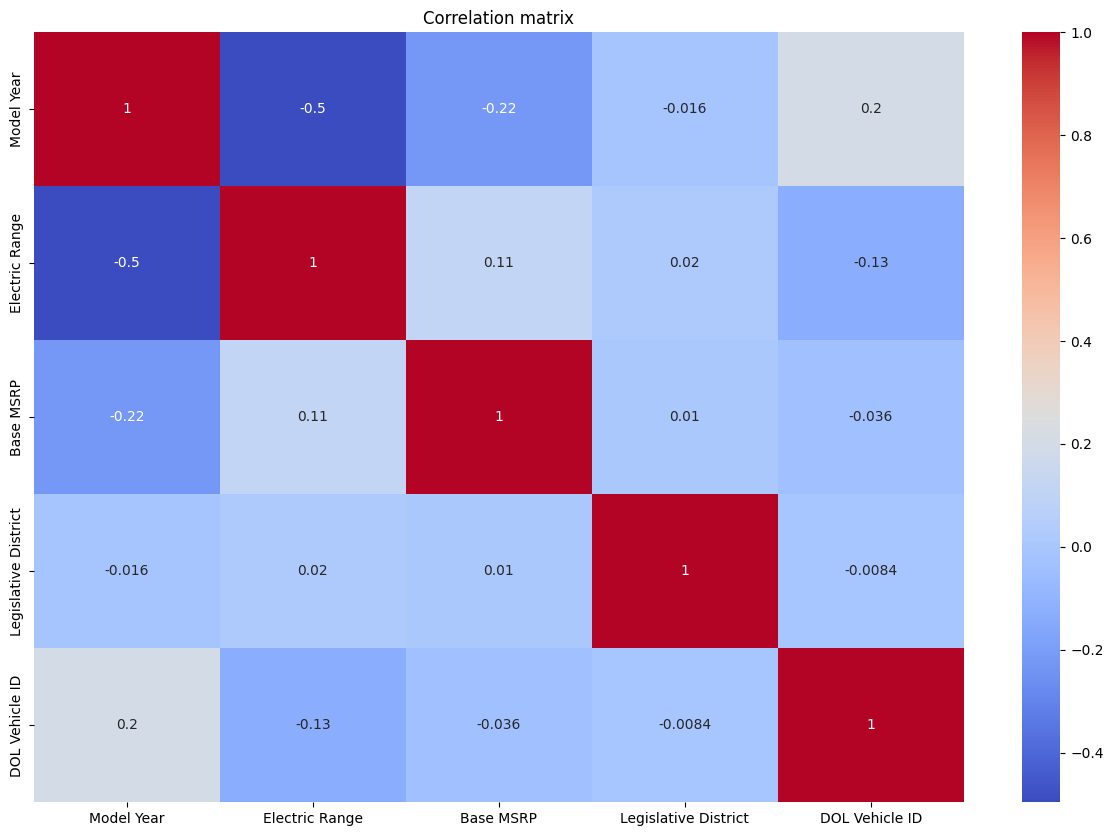

In [223]:
# Set the size of the plot
plt.figure(figsize=(15, 10))
# Select only numeric columns from the DataFrame
numeric_df = df_with_missing.select_dtypes(include=['number'])
# Create and visualize the correlation matrix
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
# Add a title to the heatmap
plt.title('Correlation matrix')
# Display the plot
plt.show()

Visual Colours:
* 
Positive correlation, or a growing association between variables, is indicated by red tone
* Negative correlation is indicated by blue tones, where one increases while the other decreases.
* A poor correlation (no tight association) is indicated by colours that are close to white.
* Value Range:

+1: Perfect positive relationship.
-1: Perfect negative relationship.
0: No relationship at all.


Additional Variables in the First Visual:
* Legislative District and Postal Code have a strong negative association (-0.41), which could be a sign of regional variations.
* The 2020 Census Tract and Postal Code have a positive association (0.5): Geographic data suggests that relationships are important.


Additional Variables in the Second Visual:
* Model Year and Electric Range show a negative association (-0.5), which could suggest that newer models have a lower electric range.
* Electric range and base MSRP have a marginally positive association (0.11), which could mean that cars with greater range cost a little more.s.

**Matplotib**

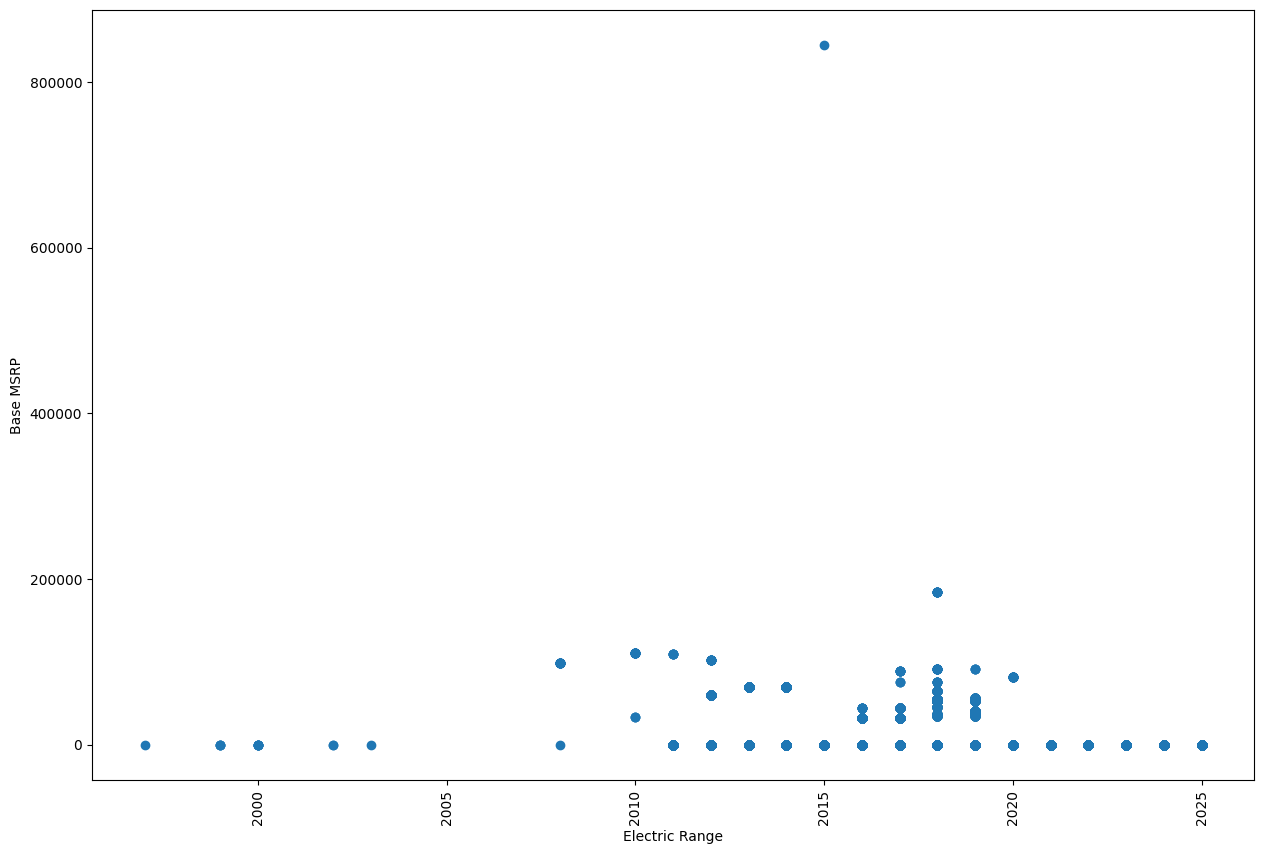

In [224]:
plt.figure(figsize=(15,10))
plt.scatter('Model Year', 'Base MSRP', data=df)

# Label the X and Y axes
plt.xticks(rotation=90) # Rotate the labels on the x-axis to make them look better
plt.xlabel('Electric Range')  # Specify the label of the x-axis
plt.ylabel('Base MSRP')   # Specify the label of the y-axis

# Grafik gösterimi
plt.show()


For this type of graphic, Base MSRP and Electric Range values can be given as an example.

The graph shows the prices of electric ranges between 2000-2025.

* Prices: In general, there aren't any notable changes. The overall trend is steady, notwithstanding occasional concentrations in particular price groups.
  
* Range: The price of electric automobiles is not directly correlated with their range.
  
* More Information: More information is required to comprehend the graph, such as the brands and features of stoves that are being utilised.
  
* In conclusion, the graph shows how the cost of electric stoves has changed over time.
 





**Seaborn**

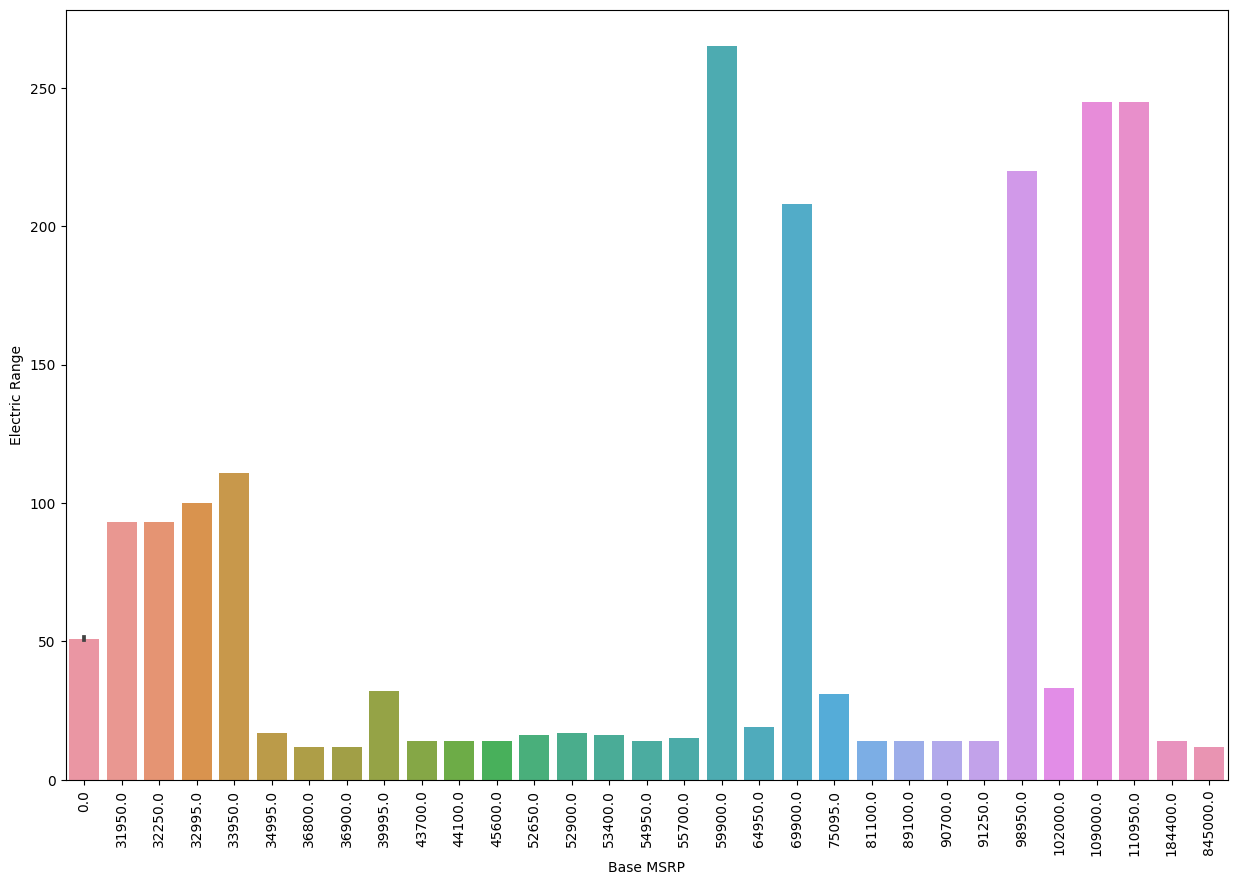

In [225]:
# We adjust the graphic size
plt.figure(figsize=(15, 10))
# We create a barplot with the Seaborn library
# 'Base MSRP' column will be used on the x-axis and 'Electric Range' column will be used on the y-axis
ax = sns.barplot(x="Base MSRP", y="Electric Range", data=df)
# We rotate the labels on the x-axis by 90 degrees to improve readability
plt.xticks(rotation=90)
# We display the graph on the screen
plt.show()

Electric Range and Base MSRP values can be taken into account.

* Price Increase, Range Increase: Generally speaking, a vehicle's electric range rises in tandem with its price. To put it another way, more costly cars can typically cover more distances.

* Exceptions: In certain price ranges, this relationship might not be entirely valid. Some mid-range cars, for instance, might have a longer range than anticipated.
  
* Distribution of Range: Vehicles within the same price range might have somewhat different ranges. Engine efficiency, various battery technology, and other things could be to blame for this.
  
* In conclusion:

By showing the relationship between price and range when purchasing an electric vehicle, this graph helps consumers make an informed decision. However, relying just on this graph to make a conclusion would be incorrect. When selecting a car, other aspects including battery technology, charging time, and other features should also be taken into account.


**Histogram**

In [226]:
def plot_hist(variable):
    plt.figure(figsize = (9,5))#We specified 9 units for the x-axis and 5 units for the height y-axis.
    plt.hist(df[variable], bins = 10) # We divided the histogram into 10 equal intervals.
    plt.xlabel(variable)
    plt.ylabel("Frequency")
    plt.title("{} Histogram".format(variable))
    plt.show()

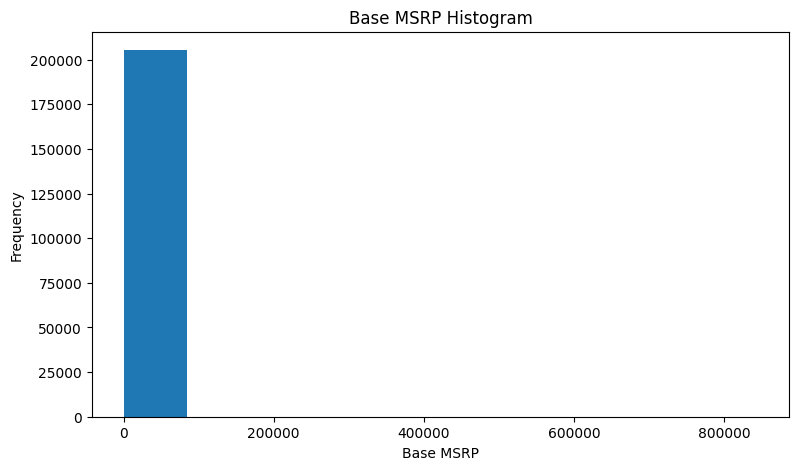

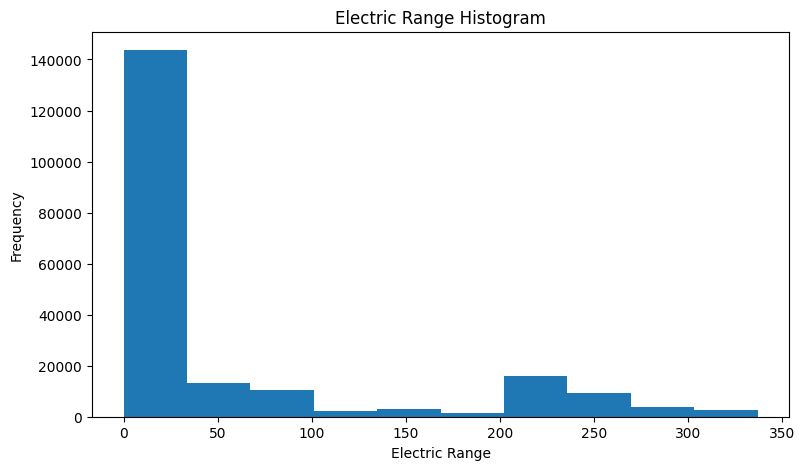

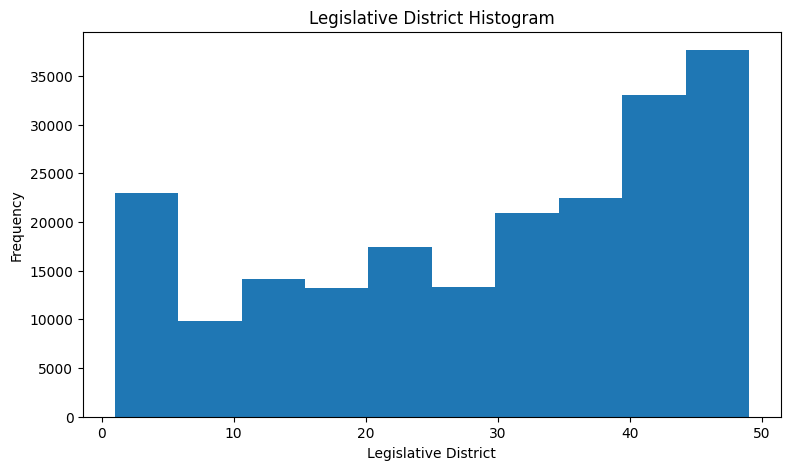

In [227]:
# Defining a list of numeric variables
numericVar = ["Base MSRP", "Electric Range","Legislative District"]
# Starting the loop, the operation will be performed for each variable in the list
for n in numericVar:
    plot_hist(n)
    # Calling the `plot_hist` function, a histogram is drawn for each variable

**Base MSRP Histogram**

* Single Peak: The chart only shows one high peak. This suggests that the majority of the products fall into the lower price range. To put it another way, most of the products are less expensive.
  
* Long Tail: To the right of the summit is a lengthy tail. This suggests that while there are a few transactions in the higher price bracket, they are quite rare. Stated differently, there is a significantly greater demand for low-cost products than for extremely expensive ones.

**Electric Range Histogram**

* Peak: A very high frequency (number of cars) in the 0–50 km range is shown at the graph's start. This suggests that short-range electric vehicles make up the majority of the dataset.

* Decreasing Frequency: The frequency rapidly drops as the range grows. This suggests that there are fewer long-range electric vehicles, and that the number of vehicles declines as range increases.

* Long Tail: The graph shows a slender tail that extends to the right. Vehicles with a range of more than 200 km are represented by this tail. It is recognised that there are long-range vehicles in the dataset, despite the very small quantity of these vehicles.

**Legislative District Histogram**

* Distribution of Population: It is evident that certain legislative districts are home to a larger population than others. For instance, the parliamentary district between 40 and 50 on the graph has the highest population density.

* Uneven Distribution: It is acknowledged that there are concentrations in certain legislative districts and that the population is not dispersed equally throughout them.

* Gaps: It is evident that certain parliamentary districts are either completely devoid of people or have a lower population than others. Political, historical, or geographic factors could be to blame for this circumstance.









# *5.Purpose of the Dataset*

In conclusion;


* Finding Comparable Car GroupsK-Means is the recommended model.Data can be divided into a specific number of clusters using K-Means.

* Deep Learning architectures are advised for more complicated issues and big data sets. CNNs, or fully connected neural networks, in particular, can be applied.

* DNN can be used for Vehicle Price or Range Estimation.
  
* Potential Issue and Suggested Fix

* Problem Description: A car manufacturer or electric vehicle vendor wishes to determine the most popular vehicle types on the market and estimate the costs of electric vehicles. Additionally, they are interested in the relationship between car demand in various locations and qualities like range and pricing.
* Data Usage: The cost of a certain model can be estimated using this data. Simultaneously, the effect of car attributes like battery capacity and range on cost may be examined. Vehicle sales can be maximised by doing this.

s.
